# Kernel Recursive Least Squares (KRLS) & Kernel Least Mean Squares

Example: Time series prediction

In [28]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from knlms import *
from krls import *

In [29]:
num_data = 3000

def generate_data(num_data):
    # AWGN
    v = 0.1*np.random.normal(0,1,num_data+2) 

    # Initial conditions
    d_true =[0.1 , 0.1]
    d = [d_true[0] + v[0], d_true[1] + v[1]]

    # Grab new data
    new_d_true = lambda d: d.append((0.8 - 0.5 * np.exp(-(d[-1]**2)))*d[-1] - (0.3 + np.exp(-(d[-1]**2)))*d[-2] + 0.1*np.sin(np.pi*d[-1]))
    for i in range(2,num_data+2):
        new_d_true(d_true)
        d.append(d_true[-1] + v[i])
    d_true = d_true[2::]
    d = d[2::]
    return d,d_true

In [30]:
# Kernel from Richard Paper
gauss_kernel = lambda u_i,u_j: np.exp(-3.73 * (np.linalg.norm(u_i - u_j,ord=2)**2))
nmse = lambda D_n, Phi_n: np.sum((D_n - Phi_n)**2)

kernel = gauss_kernel
step_size = 0.09
reg_coeff = 0.03
threshold = 0.6


In [71]:
# Per trial experiments
num_experiments = 25
mse_KNLMS = np.zeros(num_data)
mse_KRLS = np.zeros(num_data)

for i in range(num_experiments):
    print('experiment',i)
    d,d_true = generate_data(num_data)
    err_KNLMS = KNLMS(d,d_true,kernel,step_size,reg_coeff,0.5)
    mse_KNLMS += ((np.array(d_true) - np.array(d) + err_KNLMS)**2)/num_experiments
    err_KRLS = KRLS(d,d_true,kernel,0.6)
    mse_KRLS += ((np.array(d_true) - np.array(d) + err_KRLS)**2)/num_experiments

experiment 0
number of SVs 25
experiment 1
number of SVs 27
experiment 2
number of SVs 26
experiment 3
number of SVs 27
experiment 4
number of SVs 24
experiment 5
number of SVs 26
experiment 6
number of SVs 23
experiment 7
number of SVs 25
experiment 8
number of SVs 24
experiment 9
number of SVs 24
experiment 10
number of SVs 23
experiment 11
number of SVs 26
experiment 12
number of SVs 25
experiment 13
number of SVs 25
experiment 14
number of SVs 26
experiment 15
number of SVs 24
experiment 16
number of SVs 25
experiment 17
number of SVs 23
experiment 18
number of SVs 25
experiment 19
number of SVs 26
experiment 20
number of SVs 24
experiment 21
number of SVs 23
experiment 22
number of SVs 24
experiment 23
number of SVs 27
experiment 24
number of SVs 28


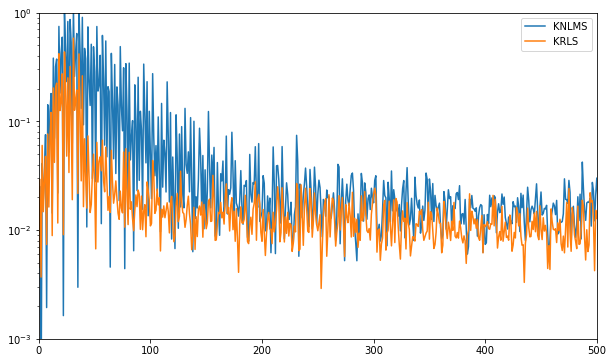

In [76]:
mse_KNLMS_smooth = np.convolve(mse_KNLMS,np.ones(19),'valid')
mse_KRLS_smooth = np.convolve(mse_KRLS,np.ones(19),'valid')
plt.figure(figsize=(10, 6))
plt.semilogy(range(len(mse_KNLMS)),mse_KNLMS, label='KNLMS')
plt.semilogy(range(len(mse_KRLS)),mse_KRLS, label='KRLS')
plt.ylim([1e-3,1e-0])
plt.xlim([0,500])
plt.legend()
plt.show()

In [31]:
d,d_true = generate_data(num_data)
err_KNLMS = KNLMS(d,d_true,kernel,step_size,reg_coeff,0.5)
mse_KNLMS = np.append(mse_KNLMS, (np.array(d_true) - np.array(d) + err_KNLMS)**2)
print('mse_KNLMS',len(err_KNLMS))
err_KRLS = KRLS(d,d_true,kernel,0.6)
mse_KNLMS = np.append(mse_KNLMS, (np.array(d_true) - np.array(d) + err_KRLS)**2)
print('mse_KRLS',len(err_KRLS))

number of SVs 24
mse_KNLMS 3000
mse_KRLS 3000
